<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/DL%20from%20Scratch/Chap03/3.%20TriFloorNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library import

In [ ]:
import numpy as np

<style>
.img {
  width: 600px;
}
</style>

# Tri Floor Neural Network


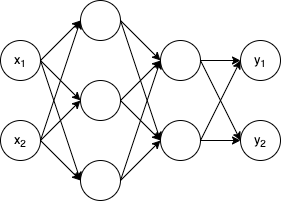

입력층 2개, 첫 번째 은닉층은 3개, 두 번째 은닉층은 2개, 출력층은 2개의 뉴런으로 구성되어있다.  

## Notiation



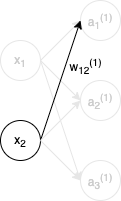

$$
{w^{(1)}_{12}}
$$  

위와 같이 표기를 할 수 있다.  

이때 하단부의 $1 \ 2$는 앞에서부터 **다음 층의 1번째 뉴런**, **앞 층의 2번째 뉴런**이라는 뜻이다. (다음 층 번호, 앞 층 번호) 순서대로 작성한다. \\

상단의 $(1)$은 **1층의 가중치**라는 의미이다.

# Signal propagate implementation

## Input Layer to 1st Hiddne Layer

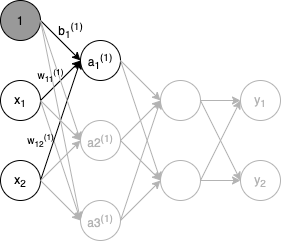  


위의 편향이 추가된 신경망의 첫 번째 은닉층의 1번 노드의 값을 계산하는 식을 적어보자.

$$
{a^{(1)}_{1}} = {w^{(1)}_{11}}x_1 + {w^{(1)}_{12}}x_2 + {b^{(1)}_{1}}
$$  

이때 행렬 곱을 활용하면 1층의 '가중치 부분'을 간소화할 수 있다.  

$$
{\vec{A}}^{(1)} = {\vec{X}}{\vec{W}}^{(1)} + {\vec{B}}^{(1)}
$$  


### Mean of notation

$$
\vec{A}^{(1)} = \left(\begin{array}
&{a^{(1)}_{1}} &{a^{(1)}_{2}} &{a^{(1)}_{3}} 
\end{array}\right)
$$  

<br>

$$
\vec{X} = \left(\begin{array}
&{x_{1}} &{x_{2}} 
\end{array}\right)
$$

<br>

$$
\vec{B}^{(1)} = \left(\begin{array}
&{b^{(1)}_{1}} &{b^{(1)}_{2}} &{b^{(1)}_{3}} 
\end{array}\right)
$$  

<br>

$$
\vec{W}^{(1)} = \left(\begin{array}
&{w^{(1)}_{11}} &{w^{(1)}_{21}} &{w^{(1)}_{31}} \\
{w^{(1)}_{12}} &{w^{(1)}_{22}} &{w^{(1)}_{32}}  
\end{array}\right)
$$


### Code implementation

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


### Activation function in hidden layer

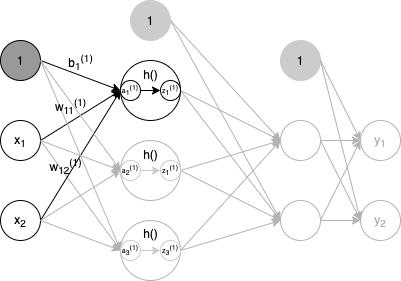

은닉층에 가중치 합을 $a$로 표기하고 활성화 함수 $h()$로 변환된 신호를 $z$로 푤기한다.  

여기서 활성화 함수는 sigmoid함수로 쓴다.

In [ ]:
# sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
Z1 = sigmoid(A1)

print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252 0.66818777 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


## 1st Hidden Layer to 2nd Hidden Layer

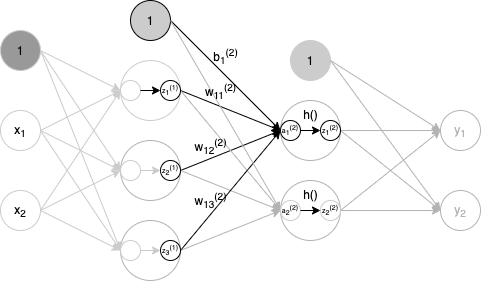

### Code Implementation

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3, )
print(W2.shape) # (3, 2)
print(B2.shape) # (2, )

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


## 2nd Hidden Layer to Output Layer


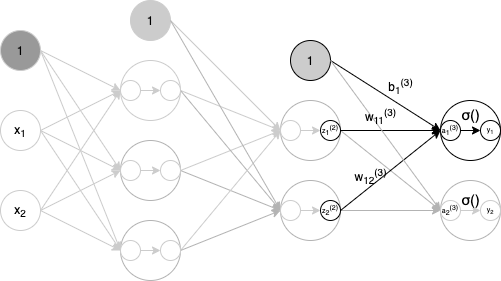

출력층으로의 구현은 앞서 했던 구현과 유사하지만 활성화 함수만 은닉층과 다르다.  
여기서는 항등 함수를 구현해서 활성화 함수로 활용해서 출력층으로 보낸다.

In [ ]:
# identity function
def identity_function(x):
  return x

In [ ]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # or Y = A3

# Total Implementation 

## network initialize

In [ ]:
def init_network():
  network = {}
  
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

## activation functions

In [ ]:
# identity function
def identity_function(x):
  return x

In [ ]:
# sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

## forward propagation

In [ ]:
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3

  y = identity_function(a3)

  return y

## main

In [ ]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]
